In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
pd.set_option('display.max_columns', 200)

In [160]:
data = pd.read_csv('netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Text(0.5, 0, 'Count')

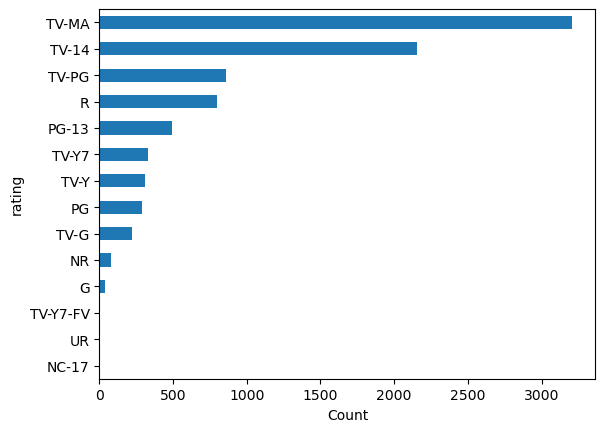

In [161]:
ax = data.rating.value_counts().sort_values().plot.barh();
ax.set_xlabel("Count")

In [162]:
data['count'] = 1
rating_by_year = data.groupby(['release_year', "rating"])['count']
rating_by_year_count = rating_by_year.sum()
rating_by_year_count.tail(20)

release_year  rating
2019          TV-Y7      36
2020          G           1
              PG         15
              PG-13      21
              R          48
              TV-14     174
              TV-G       45
              TV-MA     469
              TV-PG      80
              TV-Y       59
              TV-Y7      41
2021          PG         11
              PG-13      14
              R          21
              TV-14     151
              TV-G       21
              TV-MA     270
              TV-PG      45
              TV-Y       26
              TV-Y7      33
Name: count, dtype: int64

In [163]:
rating_by_year_count = rating_by_year_count.groupby(level=0).apply(lambda x: x.sort_values(ascending=False)[:3])


In [164]:
rating_by_year_count = rating_by_year_count.unstack('rating').droplevel([0]).fillna('0')

In [165]:
rating_by_year_count['TV-PG'] = pd.to_numeric(rating_by_year_count['TV-PG'], downcast='integer')

In [166]:
rating_by_year_count['TV-14'] = pd.to_numeric(rating_by_year_count['TV-14'], downcast='integer')

In [167]:
rating_by_year_count['TV-MA'] = pd.to_numeric(rating_by_year_count['TV-MA'], downcast='integer')

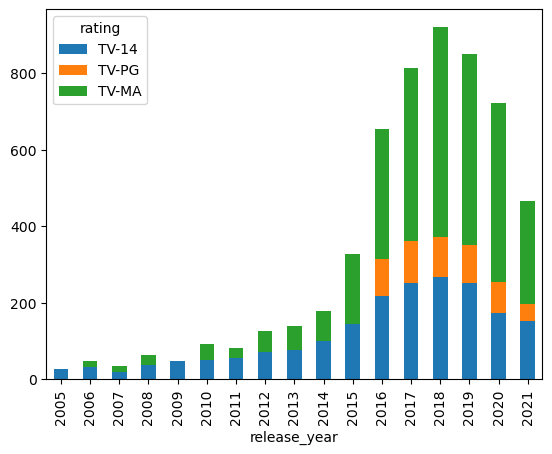

In [168]:
rating_by_year_count = rating_by_year_count[['TV-14', 'TV-PG', 'TV-MA']]
rating_by_year_count.loc[2005: , :].plot.bar(stacked=True);

### How about by percentage

In [169]:
rating_by_year_count.head()

rating,TV-14,TV-PG,TV-MA
release_year,,,
1925,1,0,0
1942,2,0,0
1943,0,3,0
1944,2,1,0
1945,2,0,2


In [170]:
rating_by_year_pct = rating_by_year_count.apply(lambda x: x/ x.sum() * 100, axis=1).loc[2000:, :]
rating_by_year_pct.head()

rating,TV-14,TV-PG,TV-MA
release_year,,,
2000,100.000000,0.000000,0.000000
2001,100.000000,0.000000,0.000000
2002,100.000000,0.000000,0.000000
2003,100.000000,0.000000,0.000000
2004,42.857143,28.571429,28.571429


### this shows that the number of tv-ma shows (for ages above 17) has increased signifucantky over the past ten years

In [171]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,1
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",1
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",1


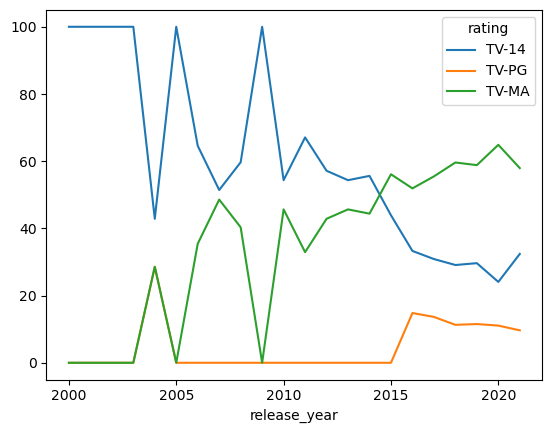

In [172]:
rating_by_year_pct.plot();

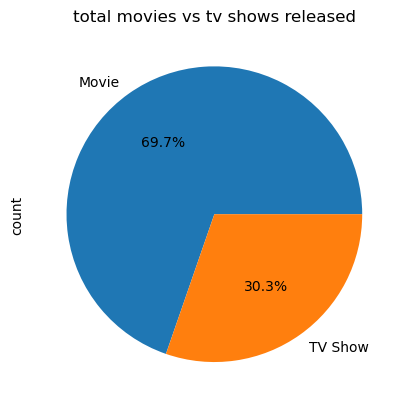

In [173]:
data.type.value_counts().plot.pie(autopct='%1.1f%%', title="total movies vs tv shows released");

In [174]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,1
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",1
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",1


### no. of releases by country

In [175]:
country = data.groupby(["country", "type"])['count'].sum()
country.head()

country    type   
Argentina  Movie      56
           TV Show    20
Australia  Movie      61
           TV Show    53
Austria    Movie       8
Name: count, dtype: int64

In [176]:
country = country.unstack(level="type").fillna(0)

In [177]:
country["sum"] = country.apply(sum, axis=1)

In [178]:
country = country.sort_values(by='sum', ascending=False)
country = country.drop(labels=["Not Given"])

In [179]:
country.head()

type,Movie,TV Show,sum
country,,,
United States,2395.0,845.0,3240.0
India,976.0,81.0,1057.0
United Kingdom,387.0,251.0,638.0
Pakistan,71.0,350.0,421.0
Canada,187.0,84.0,271.0


In [180]:
others = pd.DataFrame(country.loc['Pakistan':].sum()).T
others.index = ["Others"]

In [181]:
country_plottable = pd.concat([country.loc[:'United Kingdom'],others])

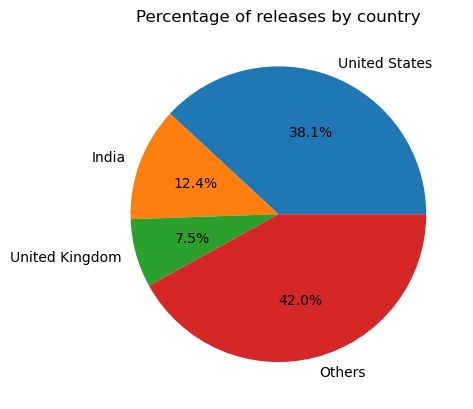

In [182]:
ax =country_plottable['sum'].plot.pie(autopct='%1.1f%%')
ax.set_title("Percentage of releases by country")
ax.set_ylabel("");

### now lets see the trend of the number of movies and tv shows released from year 2000

In [183]:
data["date_added"] = pd.to_datetime(data["date_added"])

In [184]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,1
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",1
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",1


In [190]:
year_type = data.groupby(['release_year', "type"]).count()['count']
year_type

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2019          TV Show    397
2020          Movie      517
              TV Show    436
2021          Movie      277
              TV Show    315
Name: count, Length: 119, dtype: int64

In [191]:
year_type = year_type.unstack().fillna(0)
year_type

type,Movie,TV Show
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,1.0
...,...,...
2017,765.0,265.0
2018,767.0,379.0
2019,633.0,397.0


Text(0, 0.5, 'releases')

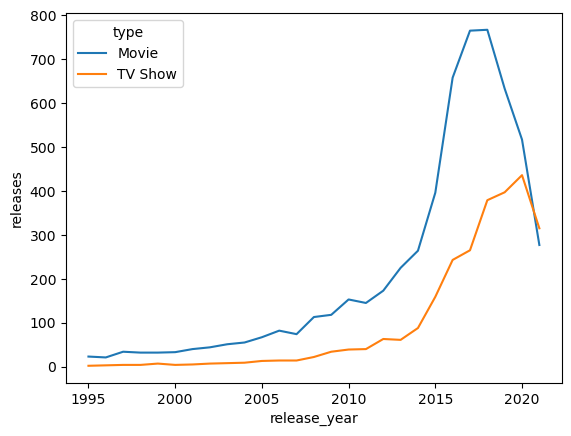

In [196]:
fig = plt.figure()
ax= fig.add_subplot()
year_type.loc[1995:].plot(ax=ax)
ax.set_ylabel("releases")